# PHAS0051 Data Analysis Problem Sheet 2020/21
## _SN: 19014831_


In [1]:
## Importing relevant libraries that may be needed.
import numpy as np
import matplotlib.pyplot as plt
import math as math
from scipy.optimize import curve_fit
from scipy.stats.distributions import chi2
from scipy.stats import t         # for working with Student's t distribution
from scipy.stats import chi2      # for working with chi-squared distribution 
%matplotlib notebook

## Question 1: Mean, Variance, Standard Deviation, Standard Error on the Mean and Confidence Limits

In [2]:
## Importing Bradford data and separating the different data columns
Year, Month, Tmax, Tmin, Rain, Sun = np.loadtxt("Bradford data.csv", delimiter=",", unpack=True, skiprows=1)

### (i) From this data set calculate the mean, variance, standard deviation and standard error on the mean for both tmax and tmin over the period 1911-2020.

The following equations will be used to calculate the mean, variance, standard deviation and standard error on the mean:

The mean of a sample of N values is given by:
$$\bar{x}=\frac{\Sigma{x_i}}{N}\tag{1}$$

The standard deviation of a sample of N values is given by:

$$\sigma_{sample}=\sqrt{\frac{\Sigma_{i=1}^{N}{(x_i-\bar{x})^2}}{N}}\tag{2}$$

The variance of a sample of N values is given by:

$$\sigma_{sample}^{2}=\frac{\Sigma_{i=1}^{N}{(x_i-\bar{x})^2}}{N}\tag{3}$$

The standard error of the mean of a sample of N values is given by:

$$SE=\frac{\sigma_{sample}}{\sqrt{N-1}}\tag{4}$$

**Equations taken from [1]**

In [3]:
## Creating a function to output mean, standard deviation, variance and standard error in the Tmax and 
## Tmin values

def analysis1(tmax,tmin):
    '''
    Analysis of mean, variance, standard deviation and standard error of the mean for an inputted array of
    Tmax and Tmin
    '''
    ## Calculating the mean:
    tmax_mean=np.mean(tmax)
    ## Calculating the variance:
    tmax_variance=(sum((tmax-tmax_mean)**2))/(len(tmax))
    ## Calculating the standard deviation:
    tmax_stdev=np.sqrt(tmax_variance)
    ## Calculating the standard error on the mean:
    tmax_mean_sterror=tmax_stdev/np.sqrt(len(tmax)-1)
    ## Calculating the mean:
    tmin_mean=np.mean(tmin)
    ## Calculating the variance:
    tmin_variance=(sum((tmin-tmin_mean)**2))/(len(tmin))
    ## Calculating the standard deviation:
    tmin_stdev=np.sqrt(tmin_variance)
    ## Calculating the standard error on the mean:
    tmin_mean_sterror=tmin_stdev/np.sqrt(len(tmin)-1)
    return(tmax_mean, tmax_variance,tmax_stdev,tmax_mean_sterror, tmin_mean, tmin_variance,tmin_stdev,
           tmin_mean_sterror)

print("For Tmax:\nThe mean value of Tmax is: {0}".format(analysis1(Tmax,Tmin)[0]))
print("The variance of Tmax is: {0}".format(analysis1(Tmax,Tmin)[1]))
print("The standard deviation of Tmax is: {0}".format(analysis1(Tmax,Tmin)[2]))
print("The standard error on the mean of Tmax is: {0}".format(analysis1(Tmax,Tmin)[3], "\n") )  
print("\nFor Tmin:\nThe mean value of Tmin is: {0}".format(analysis1(Tmax,Tmin)[4]))
print("The variance of Tmin is: {0}".format(analysis1(Tmax,Tmin)[5]))
print("The standard deviation of Tmin is: {0}".format(analysis1(Tmax,Tmin)[6]))
print("The standard error on the mean of Tmin is: {0}".format(analysis1(Tmax,Tmin)[7]))

For Tmax:
The mean value of Tmax is: 19.02935779816514
The variance of Tmax is: 2.4266610554667114
The standard deviation of Tmax is: 1.5577743917097595
The standard error on the mean of Tmax is: 0.14989691073172254

For Tmin:
The mean value of Tmin is: 11.45045871559633
The variance of Tmin is: 0.7979126336166994
The standard deviation of Tmin is: 0.893259555569768
The standard error on the mean of Tmin is: 0.08595394081073517


### (ii) Estimate the 60% and 90% confidence limits for tmax and tmin for the period 1911- 2017. Assume the distributions are Gaussian.

From **[2]** it can be seen that the 90% confidence limits are found at:

$$ x=\bar{x}\pm 1.64\frac{\sigma_{sample}}{\sqrt{N-1}}\tag{5}$$

Additionally, the 60% confidence limits are found at:

$$ x=\bar{x}\pm0.84\frac{\sigma_{sample}}{\sqrt{N-1}}\tag{6}$$

In [4]:
## Defining a function which will calculate the required confidence levels
def confidencelevel(level,mean,standerr):
    if level==90:
        conf_low=mean-1.64*standerr
        conf_high=mean+1.64*standerr
    if level== 60:
        conf_low=mean-0.84*standerr
        conf_high=mean+0.84*standerr
        
    return(conf_low,conf_high)

In [5]:
print("For the 90% confidence level:\nThe lower limit of Tmax is {0} and the upper limit of Tmax is {1}"
      .format(confidencelevel(90,analysis1(Tmax[0:106],Tmin[0:106])[0],analysis1(Tmax[0:106],Tmin[0:106])[3])
              [0],confidencelevel(90,analysis1(Tmax[0:106],Tmin[0:106])[0],
                                  analysis1(Tmax[0:106],Tmin[0:106])[3])[1]))
print("The lower limit of Tmin is {0} and the upper limit of Tmin is {1}"
      .format(confidencelevel(90,analysis1(Tmax[0:106],Tmin[0:106])[4],analysis1(Tmax[0:106],Tmin[0:106])[7])
              [0],confidencelevel(90,analysis1(Tmax[0:106],Tmin[0:106])[4],
                                  analysis1(Tmax[0:106],Tmin[0:106])[7])[1]))
print("\nFor the 60% confidence level:\nThe lower limit of Tmax is {0} and the upper limit of Tmax is {1}"
      .format(confidencelevel(60,analysis1(Tmax[0:106],Tmin[0:106])[0],analysis1(Tmax[0:106],Tmin[0:106])[3])
              [0],confidencelevel(60,analysis1(Tmax[0:106],Tmin[0:106])[0],
                                  analysis1(Tmax[0:106],Tmin[0:106])[3])[1]))
print("The lower limit of Tmin is {0} and the upper limit of Tmin is {1}"
      .format(confidencelevel(60,analysis1(Tmax[0:106],Tmin[0:106])[4],analysis1(Tmax[0:106],Tmin[0:106])[7])
              [0],confidencelevel(60,analysis1(Tmax[0:106],Tmin[0:106])[4],
                                  analysis1(Tmax[0:106],Tmin[0:106])[7])[1]))

For the 90% confidence level:
The lower limit of Tmax is 18.74632350607209 and the upper limit of Tmax is 19.24801611656942
The lower limit of Tmin is 11.275862378650297 and the upper limit of Tmin is 11.558099885500647

For the 60% confidence level:
The lower limit of Tmax is 18.868687557412905 and the upper limit of Tmax is 19.125652065228607
The lower limit of Tmin is 11.34470079495526 and the upper limit of Tmin is 11.489261469195684


### (iii) By considering tmax and tmin for the periods 1911-1920 and 1995-2020, discuss whether there is evidence of global warming in Bradford.


In order to determine whether there is global warming in Bradford, I will use a **Student t-statistic**.

The **Student t-statistic** for a two-sample t-test is given by the following formula taken from [3]:

$$t=\frac{|\bar{x_{1}}-\bar{x_{2}}|}{\sqrt{SE_{1}^{2}+SE_{2}^{2}}}\tag{7}$$

The corresponding **p-value** will also be calculated using the `scipy.stats.t.sf` function [4] and will tell us the probability of finding a more extreme value for the test statistic than the one we observe [3]. If this p-value is lower than our significance level, $\alpha=5$% then there will be sufficient evidence to reject $H_0$ and accept the alternative hypothesis $H_1$.

In order to do this, I will first work out the mean and standard error on the mean for both Tmax and Tmin in the periods 1911-1920 and in 1995-2020.

In [6]:
print("For the period 1911-1920:\n\nThe mean value of Tmax is: {0}".format(analysis1(Tmax[0:10],Tmin[0:10])[0]))
print("The standard error on the mean of Tmax is: {0}".format(analysis1(Tmax[0:10],Tmin[0:10])[3], "\n"))
print("\nThe mean value of Tmin is: {0}".format(analysis1(Tmax[0:10],Tmin[0:10])[4]))
print("The standard error on the mean of Tmin is: {0}".format(analysis1(Tmax[0:10],Tmin[0:10])[7]))

For the period 1911-1920:

The mean value of Tmax is: 18.57
The standard error on the mean of Tmax is: 0.5787054518492116

The mean value of Tmin is: 10.870000000000001
The standard error on the mean of Tmin is: 0.34802618036898064


In [7]:
print("For the period 1995-2020:\n\nThe mean value of Tmax is: {0}"
      .format(analysis1(Tmax[83:109],Tmin[83:109])[0]))
print("The standard error on the mean of Tmax is: {0}".format(analysis1(Tmax[83:109],Tmin[83:109])[3], "\n"))   
print("\nThe mean value of Tmin is: {0}".format(analysis1(Tmax[83:109],Tmin[83:109])[4]))
print("The standard error on the mean of Tmin is: {0}".format(analysis1(Tmax[83:109],Tmin[83:109])[7]))

For the period 1995-2020:

The mean value of Tmax is: 19.957692307692305
The standard error on the mean of Tmax is: 0.21591829486908148

The mean value of Tmin is: 12.153846153846157
The standard error on the mean of Tmin is: 0.14209755795344042


Firstly, by considering Tmax in the two periods; we can set up a hypothesis test:

- $H_0: \bar{x_{1}}=\bar{x_{2}}$
- $H_1: \bar{x_{1}}<\bar{x_{2}}$ 

with $\alpha=5$%

(where $\bar{x_{1}}$= Tmax mean in 1911-1920 and $\bar{x_{2}}$= Tmax mean in 1995-2020)

In [8]:
K=9 # Degrees of freedom is calculated as the number of data points from the smallest sample minus 1
## Defining the variables needed to calculate the t-statistic
x1=analysis1(Tmax[0:10],Tmin[0:10])[0]
x2=analysis1(Tmax[83:109],Tmin[83:109])[0]
se1=analysis1(Tmax[0:10],Tmin[0:10])[3]
se2= analysis1(Tmax[83:109],Tmin[83:109])[3]
## Calculating the t-statistic and hence the p-value and outputting these
t_statistic_max=(abs(x1-x2))/(np.sqrt(se1**2+se2**2))
print("The value of the Student t-statistic for comparison of mean Tmax values is {0}".format(t_statistic_max))
p_value_max = t.sf(t_statistic_max, K) 
print("This corresponds to a p-value of {0}%".format(p_value_max*100))
## if statement to see whether there is enough evidence to reject the null hypothesis
if p_value_max<0.05:
    print("\nTherefore, there is sufficient evidence to reject the null hypothesis and conclude that there is an increase in the mean Tmax values from 1911-1920 to 1995-2020.")

The value of the Student t-statistic for comparison of mean Tmax values is 2.2466432853860834
This corresponds to a p-value of 2.5641863825997877%

Therefore, there is sufficient evidence to reject the null hypothesis and conclude that there is an increase in the mean Tmax values from 1911-1920 to 1995-2020.


The obtained p-value is $p = 0.0256$. This means that the probability of finding a sample mean within 2.24 combined standard errors (as the t-statistic formula for two samples combines standard error of the mean from $\bar{x}_1$ and the standard error of the mean from $\bar{x}_2$ by summing them in quadrature, i.e $\sqrt{SE_{1}^{2}+SE_{2}^{2}}$) of $\bar{x_1}$ is $\sim97.44~\%$ and hence that the probability of finding a sample mean outside that interval is $\sim 2.56~\%$. As a result, the probability of finding a sample mean as far from the $\bar{x}_1$ as $\bar{x}_2$ is measured to be, or further, due to sampling errors, is $\sim 2.56~\%$, i.e, very unlikely. Therefore, there is sufficient evidence to reject the hypothesis that the $\bar{x}_1=\bar{x}_2$.

Now, by considering Tmax in the two periods; we can set up a hypothesis test:

- $H_0: \bar{x_{3}}=\bar{x_{4}}$
- $H_1: \bar{x_{3}}<\bar{x_{4}}$ 

with $\alpha=5$%

(where $\bar{x_{3}}$= Tmin mean in 1911-1920 and $\bar{x_{4}}$= Tmin mean in 1995-2020)

Computing this, we get:

In [9]:
## Defining the variables needed to calculate the t-statistic
x3=analysis1(Tmax[0:10],Tmin[0:10])[4]
x4=analysis1(Tmax[83:109],Tmin[83:109])[4]
se3=analysis1(Tmax[0:10],Tmin[0:10])[7]
se4= analysis1(Tmax[83:109],Tmin[83:109])[7]
## Calculating the t-statistic and hence the p-value and outputting these
t_statistic_min=(abs(x3-x4))/(np.sqrt(se3**2+se4**2))
print("The value of the Student t-statistic for comparison of mean Tmin values is {0}".format(t_statistic_min))
p_value_min = t.sf(t_statistic_min, K) 
print("This corresponds to a p-value of {0}%".format(p_value_min*100))
## if statement to see whether there is enough evidence to reject the null hypothesis
if p_value_min<0.05:
    print("\nTherefore, there is sufficient evidence to reject the null hypothesis and conclude that there is an increase in the mean Tmin values from 1911-1920 to 1995-2020.")

The value of the Student t-statistic for comparison of mean Tmin values is 3.4152341505716644
This corresponds to a p-value of 0.38428371142399453%

Therefore, there is sufficient evidence to reject the null hypothesis and conclude that there is an increase in the mean Tmin values from 1911-1920 to 1995-2020.


The obtained p-value is $p = 0.0038$. This means that the probability of finding a sample mean within 3.42 combined standard errors (as the t-statistic formula for two samples combines standard error of the mean from $\bar{x}_3$ and the standard error of the mean from $\bar{x}_4$ by summing them in quadrature, i.e $\sqrt{SE_{3}^{2}+SE_{4}^{2}}$) of $\bar{x_3}$ is $\sim99.62~\%$ and hence that the probability of finding a sample mean outside that interval is $\sim 0.38~\%$. As a result, the probability of finding a sample mean as far from the $\bar{x}_3$ as $\bar{x}_4$ is measured to be, or further, due to sampling errors, is $\sim 0.38~\%$, i.e, extremely unlikely. Therefore, there is sufficient evidence to reject the hypothesis that the $\bar{x}_3=\bar{x}_4$.

In conclusion, using the **Student t-statistic**; in both cases, it can clearly be seen that the p-value obtained from conducting a Student t-statistic is below our 5% significance level. As a result, as **$p<\alpha$** we can conclude that the null hypotheses that the mean Tmin and Tmax values in 1911-1920 were equal to the mean Tmin and Tmax values in 1995-2020 can be rejected and instead it can be seen that the mean Tmin and Tmax values have increased from the period 1911-1920 when calculated in the period 1995-2020 to a 5% significance level. Hence, as both the mean of Tmin and Tmax in 1995-2020 is higher than their respective mean values in 1911-1920, this is evidence to suggest that global warming is present and it can be seen in the data from Bradford station.

However, there are limitations to this method of testing, namely that the two periods considered are not of the same length as one ranges from 1911-1920 (10 data points) and one ranges from 1995-2020 (25 data points); as a result, the value of the degrees of freedom used in calculating the t-statistic was lower than if there were equal intervals used. For example, comparing data from 1911-1936 and 1995-2020 would allow us to more confidently suggest that there is global warming- this is because as the degrees of freedom would increase from 9 to 24, this would increase the t-statistic and hence reduce the p-value allowing us to suggest the existence of global warming with greater certainty. 

With that being said, although comparing equal period may have allowed us to more confidently suggest the existence of global warming; using the periods in question and the Students t-statistic, we can still suggest to a high level of confidence that the data illustrates the presence of global warming in Bradford.

## Question 2: Linear fit and $\chi^{2}$

### (i) Using an appropriate program, least squares fit the data to a straight line. Make sure you fully label the graph.

In [10]:
## Importing Q2 data and separating the different data columns
V, I, dI = np.loadtxt("Q2 data.csv", delimiter=",", unpack=True, skiprows=1) 

### Formulas to be used:

S is defined as the sum of the square of the residuals:

$$S=\sum_{i=1}^{n}d_{i}^{2}=\sum_{i=1}^{n}[y_{i}-y_{line}(x_{i})]^{2}=\sum_{i=1}^{n}(y_{i}-mx_{i}-c)^{2}\tag{8}$$

The gradient and y-intercept of the least squares fitting line along with their respective uncertainties:

$$m=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})y_{i}}{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}\tag{9}$$

$$c=\bar{y}-m\bar{x}\tag{10}$$

$$\Delta m = \sqrt{\frac{S}{(n-2)D}}\tag{11}$$

$$\Delta c = \sqrt{\bigg(\frac{1}{n}+\frac{\bar x ^2}{D}\bigg)\frac{S}{(n-2)}}\tag{12}$$

Where,

$$D= \sum_{i=1}^{n}(x_i-\bar x)^2\tag{13}$$

**Equations taken from [1]**

In [11]:
## Coding the least squares best fit line

## Calculating the number of data points
n= len(V)
V_mean= np.mean(V)
I_mean= np.mean(I)
m= sum((V-V_mean)*I) / (sum((V-V_mean)**2))
c= I_mean- m*V_mean
S= sum((I-m*V-c)**2)
D= sum((V-V_mean)**2)
delta_m= np.sqrt(S/(n-2)*D)
delta_c= np.sqrt(((1/n)+((V_mean)**2)/D)*S/(n-2))

<IPython.core.display.Javascript object>


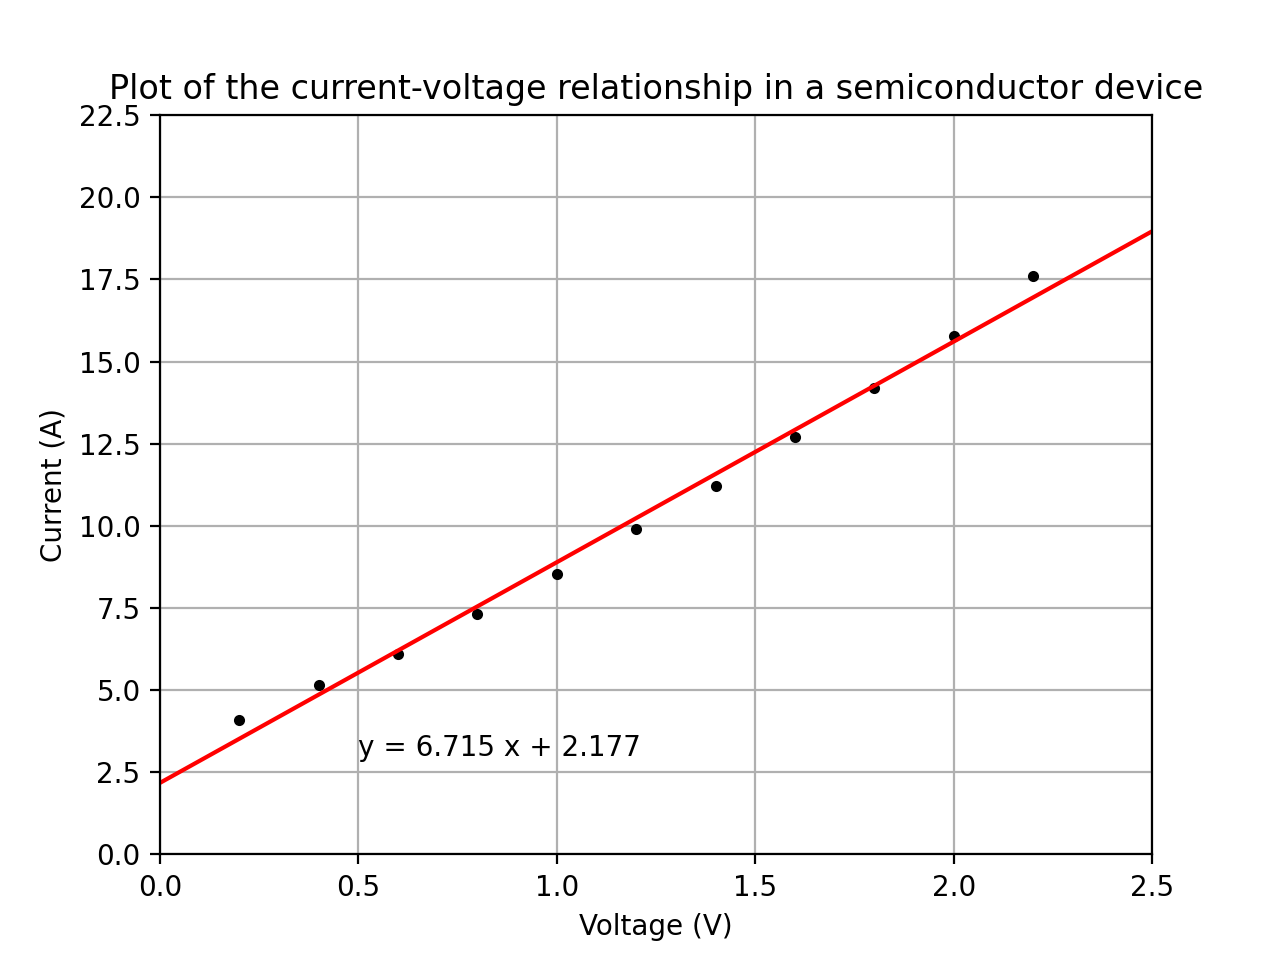

The gradient of our least squares linear regression line is 6.715 +/- 0.816 A/V
The y-intercept of our least squares linear regression line is 2.18 +/- 0.25 A


In [12]:
## Plotting the data:
plt.figure()
plt.plot(V, I, "k.") 
## Labelling and defining limits for the plot.
plt.grid(True) 
plt.xlim(0,2.5)
plt.ylim(0,22.5)
plt.title('Plot of the current-voltage relationship in a semiconductor device') 
plt.xlabel('Voltage (V)') 
plt.ylabel('Current (A)')

## Plotting the least squares regression line
x=np.array([0,3]) ## Defining the values of x
y=m*x+c ## Equation of the linear regression line
plt.plot(x,y,'r')
plt.text(0.5,3, "y = {0:0.3f} x + {1:0.3f}".format(m,c),size=10) ## This plots the equation of the regression line
plt.show()

print("The gradient of our least squares linear regression line is {0:0.3f} +/- {1:0.3f} A/V"
      .format (m, delta_m))
print("The y-intercept of our least squares linear regression line is {0:0.2f} +/- {1:0.2f} A"
      .format (c, delta_c))

### (ii) Calculate the $\chi^{2}$ probability for the fit.

To calculate the chi-squared statistic I use the following formula:

$$\chi^{2}= \sum_{i=1}^{n}\bigg(\frac{(y_{i}-y_{fitted}(x_{i})}{\Delta y_{i}}\bigg)^2\tag{14}$$

To calculate the chi-squared probability, I will use the `chi2.sf` function from [5].

In [13]:
yfit=m*V+c
chi_sq1=np.sum(((I-yfit)/dI)**2)
print("The chi-squared statistic is given by {0}".format(chi_sq1))
## Calculating the chi-squared probability [5]
chi_sq1_prob=chi2.sf(chi_sq1,9)
print("The chi-squared probability is given by {0}%".format(chi_sq1_prob*100))

The chi-squared statistic is given by 21.790123636363624
The chi-squared probability is given by 0.9568470745686791%


### (iii) Plot the data with uncertainty bars and the best fit line on the same graph.

<IPython.core.display.Javascript object>


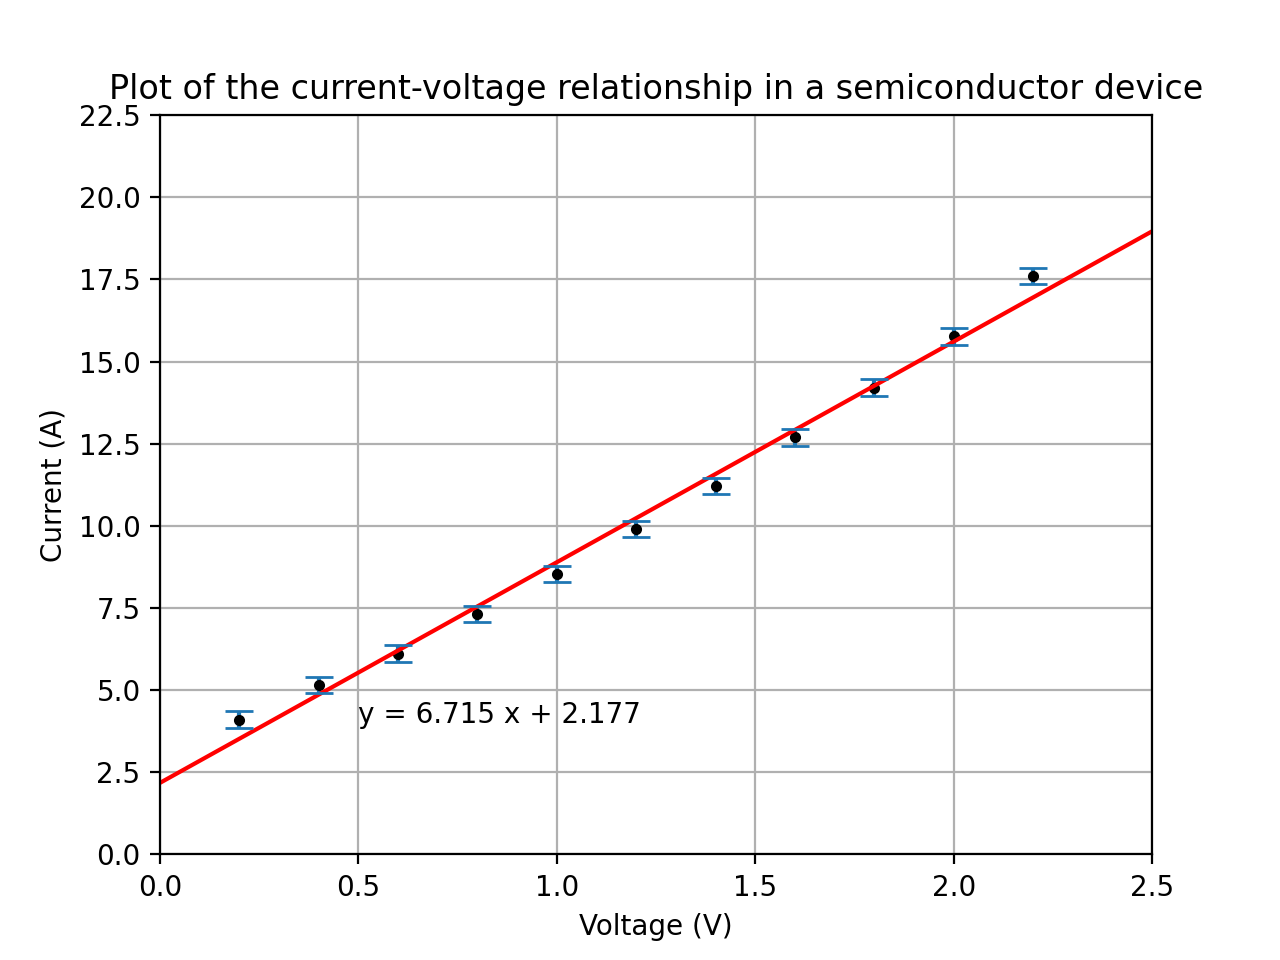

The gradient of our least squares linear regression line is 6.715 +/- 0.816 A/m
The y-intercept of our least squares linear regression line is 2.18 +/- 0.25 A


In [33]:
## Plotting the data:
plt.figure()
plt.plot(V, I, "k.") 
## Labelling and defining limits for the plot.
plt.grid(True) 
plt.xlim(0,2.5)
plt.ylim(0,22.5)
plt.title('Plot of the current-voltage relationship in a semiconductor device') 
plt.xlabel('Voltage (V)') 
plt.ylabel('Current (A)')

## Plotting the least squares regression line
x=np.array([0,3]) ## Defining the values of x
y=m*x+c ## Equation of the linear regression line
plt.plot(x,y,'r')
plt.errorbar(V,I,yerr=dI, fmt='none',capsize=5)
plt.text(0.5,4, "y = {0:0.3f} x + {1:0.3f}".format(m,c),size=10) ## This plots the equation of the regression line
plt.show()

print("The gradient of our least squares linear regression line is {0:0.3f} +/- {1:0.3f} A/m"
      .format (m, delta_m))
print("The y-intercept of our least squares linear regression line is {0:0.2f} +/- {1:0.2f} A"
      .format (c, delta_c))

### (iv) Comment on the outcome of the experiment in light of $\chi^{2}$ probability calculated in (ii) and the graphical comparison of the best fit line and the data in (iii).



By considering the value obtained for the $\chi^2$ statistic, for a good fit, we would expect the $\chi^2$ statistic to be $\approx n$ in order for the fit to be a good fit. However, we had $n=11$ but obtained that the $\chi^2=21.79$ which illustrates that the linear fit to the data is not a good one.

Furthermore, considering the $\chi^2_{prob}$, a small $\chi^2_{prob}$ is an indicator of a poor fit to the data as it would mean that the probability of obtaining $\chi^2\ge\chi^2_{measured}$ is very unlikely. From the data, we obtained that the probability of obtaining $\chi^2_{prob}=Prob(\chi^2\ge21.79$)=0.96%$ which indicates that the linear fit chosen is a very poor fit to the current and voltage relationship in the semiconductor device.

Additionally, by considering the graph in part (iii), it can be seen that the linear least squares regression line (line of best fit) doesn't go through a large majority of the points with their associated error bars; this further illustrates that the linear fit is an inadequate fit to the data.

With that being said, the large $\chi^2$ statistic which we observed could also be due to the uncertainties in the current being underestimated; this can be seen in equation (14), if the $\Delta y_i$ is lower than it should be (i.e underestimated), this would lead to a $\chi^2$ value which is higher than the true $\chi^2$ statistic for the fit to this data- this would also then affect the $\chi^2_{prob}$ as the $\chi^2$ value would be lower, therefore, $\chi^2\ge\chi^2_{measured}$ would be more likely and so $\chi^2_{prob}$ would be greater which may lead to different conclusion being made about the fit to the data.

In conclusion, I believe that although there could have been an underestimate in the uncertainty used to calculate the $\chi^2$ statistic there is still enough evidence to suggest a poor fit just by looking at the plotted data- we can see that the linear fit does not accurately represent the trend shown by the data points, which looks more exponential. Finally, from [6], the theoretical I-V graph for a semiconductor diode can be seen and the theoretical fit to the data is an exponential increase, not a linear fit, which provides further evidence that the linear fit to the data is insufficient and should not be used.

## Question 3: Poisson Distribution and $\chi^{2}$

### (i) Calculate the mean number of goals (𝜇) scored per game, the variance and the standard deviation.

The following equations will be used to calculate the mean, variance and standard deviation:

The mean of a sample of N values is given by:

$$\bar{x}=\frac{\sum fx}{\sum f}\tag{15}$$

The standard deviation is given by:

$$\sigma_{sample}=\sqrt{\frac{\sum fx^2}{\sum f}-\frac{\sum fx}{\sum f}}\tag{16}$$

The variance of a sample of N values is given by:

$$\sigma_{sample}^{2}=\frac{\sum fx^2}{\sum f}-\frac{\sum fx}{\sum f}\tag{17}$$

**Equations taken from [7]**

In [15]:
## Creating arrays of the values given:

goals=np.array([0,1,2,3,4,5,6,7,8])
franken=np.array([1,5,9,6,5,2,2,1,0])
stein=np.array([2,4,11,5,3,3,4,1,1])
## Total number of goals scored by each team
frankengoals=franken*goals
steingoals=stein*goals

In [16]:
## Calculating the mean, standard deviation and variance for Franken FC and Stein City:
franken_mean=(sum(frankengoals))/(sum(franken))
franken_stdev=np.sqrt((sum(franken*(goals**2)))/(sum(franken))-franken_mean**2)
franken_variance=franken_stdev**2
stein_mean=(sum(steingoals))/(sum(stein))
stein_stdev=np.sqrt((sum(stein*goals**2))/(sum(stein))-stein_mean**2)
stein_variance=stein_stdev**2

In [17]:
print("The mean number of goals scored for FC Franken is {0}".format(franken_mean))
print("The mean number of goals scored for Stein City is {0}".format(stein_mean))

print("\nThe standard deviation from the mean number of goals scored for FC Franken is {0}"
      .format(franken_stdev))
print("The standard deviation from the mean number of goals scored for Stein City is {0}"
      .format(stein_stdev))

print("\nThe variance in the number of goals scored for FC Franken is {0}".format(franken_variance))
print("The variance in the number of goals scored for Stein City is {0}".format(stein_variance))

The mean number of goals scored for FC Franken is 2.903225806451613
The mean number of goals scored for Stein City is 3.1470588235294117

The standard deviation from the mean number of goals scored for FC Franken is 1.6530487710088977
The standard deviation from the mean number of goals scored for Stein City is 2.0019454206166634

The variance in the number of goals scored for FC Franken is 2.732570239334027
The variance in the number of goals scored for Stein City is 4.007785467128029


### (ii) Using the values for the mean found in (i) calculate the theoretically expected Poisson frequencies for each number of goals.

The formula for a Poisson probability is given as follows:

$$P(r)=\frac{\mu^r e^{-r}}{r!}\tag{18}$$

where $\mu$= mean and $r$= frequency.

Equation given in question.

In [18]:
## Defining a function to calculate the Poisson probability for a given mean and frequency.
def poissonfunc(mean,r):
    poisson=(mean**r*np.exp(-1*mean))/math.factorial(r)
    return poisson

In [19]:
print("For Franken FC:\n")

print("The theoretical poisson frequency for {0} goals is {1}".format(0,poissonfunc(franken_mean,0)*sum(franken)))
print("The theoretical poisson frequency for {0} goals is {1}".format(1,poissonfunc(franken_mean,1)*sum(franken)))
print("The theoretical poisson frequency for {0} goals is {1}".format(2,poissonfunc(franken_mean,2)*sum(franken)))
print("The theoretical poisson frequency for {0} goals is {1}".format(3,poissonfunc(franken_mean,3)*sum(franken)))
print("The theoretical poisson frequency for {0} goals is {1}".format(4,poissonfunc(franken_mean,4)*sum(franken)))
print("The theoretical poisson frequency for {0} goals is {1}".format(5,poissonfunc(franken_mean,5)*sum(franken)))
print("The theoretical poisson frequency for {0} goals is {1}".format(6,poissonfunc(franken_mean,6)*sum(franken)))
print("The theoretical poisson frequency for {0} goals is {1}".format(7,poissonfunc(franken_mean,7)*sum(franken)))
print("The theoretical poisson frequency for {0} goals is {1}".format(8,poissonfunc(franken_mean,8)*sum(franken)))

print("\nFor Stein City:\n")
print("The theoretical poisson frequency for {0} goals is {1}".format(0,poissonfunc(stein_mean,0)*sum(stein)))
print("The theoretical poisson frequency for {0} goals is {1}".format(1,poissonfunc(stein_mean,1)*sum(stein)))
print("The theoretical poisson frequency for {0} goals is {1}".format(2,poissonfunc(stein_mean,2)*sum(stein)))
print("The theoretical poisson frequency for {0} goals is {1}".format(3,poissonfunc(stein_mean,3)*sum(stein)))
print("The theoretical poisson frequency for {0} goals is {1}".format(4,poissonfunc(stein_mean,4)*sum(stein)))
print("The theoretical poisson frequency for {0} goals is {1}".format(5,poissonfunc(stein_mean,5)*sum(stein)))
print("The theoretical poisson frequency for {0} goals is {1}".format(6,poissonfunc(stein_mean,6)*sum(stein)))
print("The theoretical poisson frequency for {0} goals is {1}".format(7,poissonfunc(stein_mean,7)*sum(stein)))
print("The theoretical poisson frequency for {0} goals is {1}".format(8,poissonfunc(stein_mean,8)*sum(stein)))

For Franken FC:

The theoretical poisson frequency for 0 goals is 1.7002263649208842
The theoretical poisson frequency for 1 goals is 4.936141059447729
The theoretical poisson frequency for 2 goals is 7.165366054037025
The theoretical poisson frequency for 3 goals is 6.934225213584218
The theoretical poisson frequency for 4 goals is 5.032905396956287
The theoretical poisson frequency for 5 goals is 2.9223321659746184
The theoretical poisson frequency for 6 goals is 1.4140316932135253
The theoretical poisson frequency for 7 goals is 0.5864647575539966
The theoretical poisson frequency for 8 goals is 0.21282995233814392

For Stein City:

The theoretical poisson frequency for 0 goals is 1.4612638341321975
The theoretical poisson frequency for 1 goals is 4.598683242710151
The theoretical poisson frequency for 2 goals is 7.236163337793913
The theoretical poisson frequency for 3 goals is 7.5908772269014575
The theoretical poisson frequency for 4 goals is 5.972234288812177
The theoretical poi

### (iii) Calculate the $\chi^2$  probabilities 𝑃 ($\chi^2$) that the frequency distributions follow the expected Poisson distributions with the means you have determined. You can approximate the error on each frequency, N, by a Gaussian with standard deviation, $\sqrt(𝑁)$, (See Notes 2 & 3 at the end of this question).

To do this, we use the formula stated below which gives the $\chi^2$ statistic for a Poisson distribution.

$$\chi^2=\sum{\frac{(y_i-\bar{y}_i)^2}{\bar{y}_i}}\tag{19}$$

Similarly to before, to calculate the chi-squared probability, I will use the `chi2.sf` function from [5].

Note: the degrees of freedom used to calculate a $\chi^2$ statistic for a Poisson distribution is given by $K=n-m-1$ where $n$= number of data points and $m$= is the number of fitting parameters [1].

In [20]:
## Initialising arrays to fill with poisson frequencies for Franken FC and Stein City.
poisson_frankengoals=[]
poisson_steingoals=[]

for i in range(len(goals)):
    pf_frankengoals=poissonfunc(franken_mean,i)*sum(franken)
    poisson_frankengoals.append(pf_frankengoals)

for i in range(len(goals)):
    pf_steingoals=poissonfunc(stein_mean,i)*sum(stein)
    poisson_steingoals.append(pf_steingoals)

# Combining bins so that each bin is greater than 5:
newpoisson_franken=np.array([(poisson_frankengoals[0]+poisson_frankengoals[1]),poisson_frankengoals[2],
                             poisson_frankengoals[3],poisson_frankengoals[4],
                             (poisson_frankengoals[5]+poisson_frankengoals[6]+poisson_frankengoals[7]+
                              poisson_frankengoals[8])])
newpoisson_stein=np.array([(poisson_steingoals[0]+poisson_steingoals[1]),poisson_steingoals[2],
                           poisson_steingoals[3],(poisson_steingoals[4]+poisson_steingoals[5]),
                           (poisson_steingoals[6]+poisson_steingoals[7]+poisson_steingoals[8])])
newfreq_frankengoals=np.array([(franken[0]+franken[1]),franken[2],franken[3],franken[4],
                               (franken[5]+franken[6]+franken[7]+franken[8])])
newfreq_steingoals=np.array([(stein[0]+stein[1]),stein[2],stein[3],(stein[4]+stein[5]),
                             (stein[6]+stein[7]+stein[8])])

In [21]:
## Calculating the chi-squared statistic and probability for Franken FC and Stein City

K=3 # Number of degrees of freedom.
franken_chi_sq=np.sum(((newfreq_frankengoals-newpoisson_franken)**2/newpoisson_franken))
print("The chi-squared statistic for Franken FC's goal frequency is given by {0}".format(franken_chi_sq))

stein_chi_sq=np.sum(((newfreq_steingoals-newpoisson_stein)**2/newpoisson_stein))
print("The chi-squared statistic for Stein City's goal frequency is given by {0}".format(stein_chi_sq))

# Calculating the chi-squared probability:

franken_chi_sqprob=chi2.sf(franken_chi_sq,K)
stein_chi_sqprob=chi2.sf(stein_chi_sq,K)

print("The chi-squared probability for Franken FC's goal frequency is given by {0}%".format(franken_chi_sqprob*100))
print("The chi-squared probability for Stein City's goal frequency is given by {0}%".format(stein_chi_sqprob*100))

The chi-squared statistic for Franken FC's goal frequency is given by 0.6604286587737106
The chi-squared statistic for Stein City's goal frequency is given by 6.70640639232689
The chi-squared probability for Franken FC's goal frequency is given by 88.24696440435484%
The chi-squared probability for Stein City's goal frequency is given by 8.186827594335348%


### (iv) Plot the experimental data and theoretical Poisson distributions.

<IPython.core.display.Javascript object>


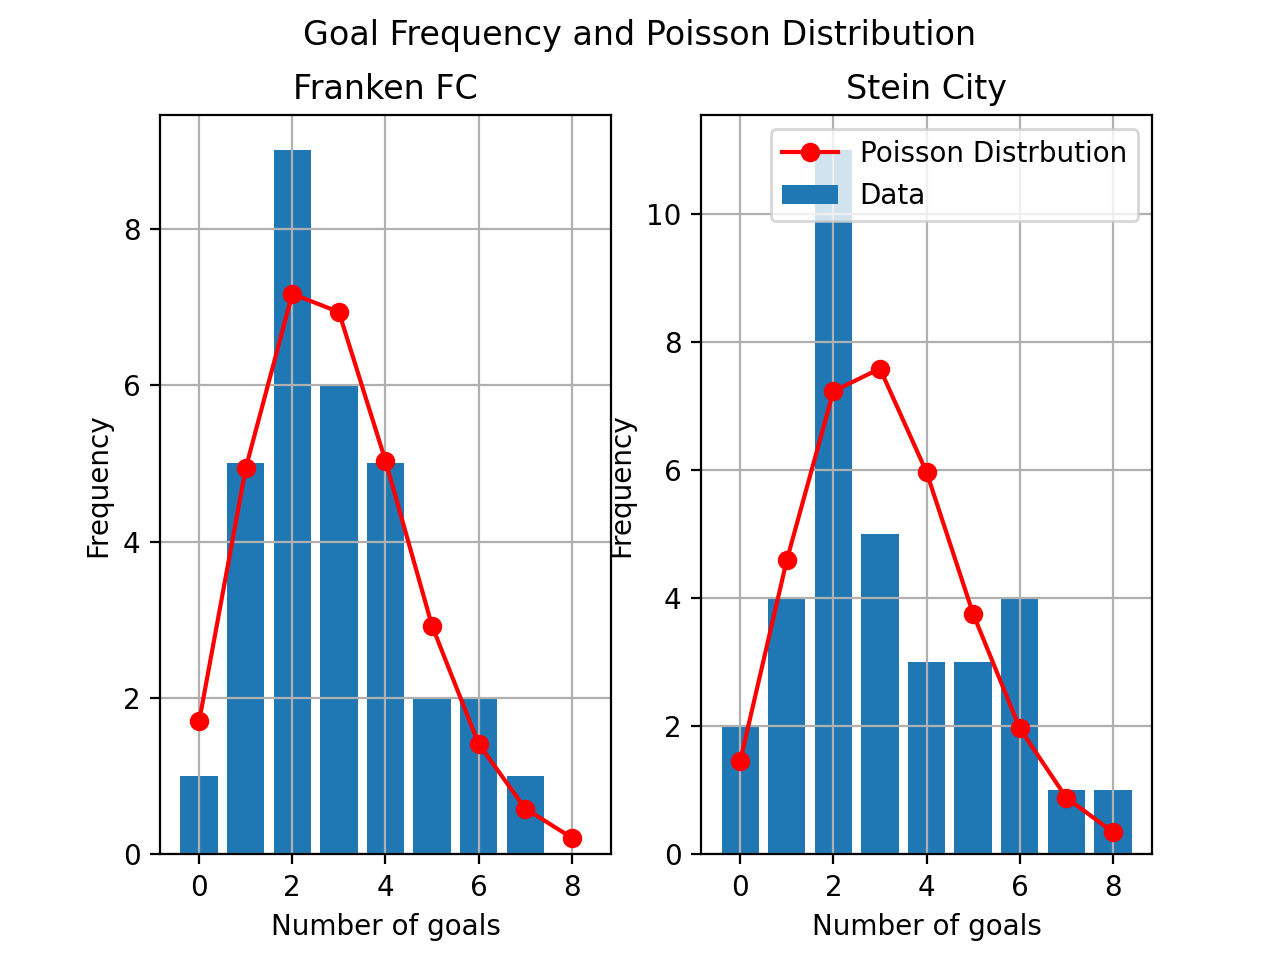

In [22]:
## Plotting the data:
plt.figure()
plt.subplot(1,2,1)
plt.bar(goals, franken, label= "Data")
plt.plot(goals,poisson_frankengoals,'ro-', label= "Poisson Distrbution") 
plt.grid(True)
plt.title("Franken FC") 
plt.xlabel("Number of goals") 
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.bar(goals, stein, label= "Data")
plt.plot(goals,poisson_steingoals,'ro-', label= "Poisson Distrbution")
## Labelling and defining limits for the plot.
plt.grid(True) 
plt.title("Stein City") 
plt.xlabel("Number of goals") 
plt.ylabel("Frequency")

plt.suptitle("Goal Frequency and Poisson Distribution")
plt.legend(loc="best")

<IPython.core.display.Javascript object>


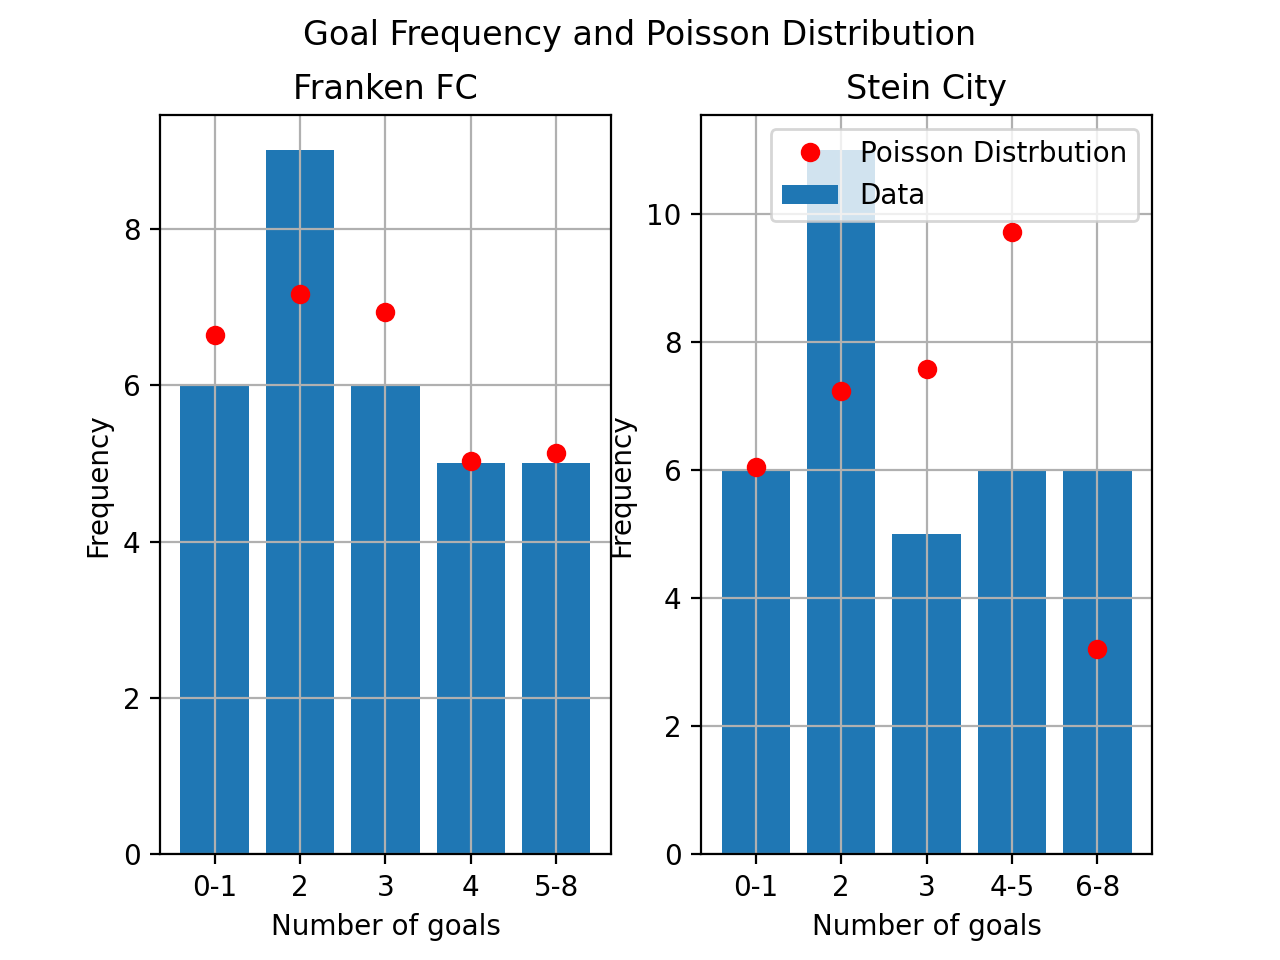

In [24]:
## Plotting the data:
plt.figure()
plt.subplot(1,2,1)
barsFranken=('0-1','2','3','4','5-8')
plt.bar(barsFranken, newfreq_frankengoals, label= "Data")
plt.plot(barsFranken,newpoisson_franken,'ro', label= "Poisson Distrbution") 
plt.grid(True)
plt.title("Franken FC") 
plt.xlabel("Number of goals") 
plt.ylabel("Frequency")

plt.subplot(1,2,2)
barsStein=('0-1','2','3','4-5','6-8')
plt.bar(barsStein, newfreq_steingoals, label= "Data")
plt.plot(barsStein, newpoisson_stein,'ro', label= "Poisson Distrbution")
## Labelling and defining limits for the plot.
plt.grid(True) 
plt.title("Stein City") 
plt.xlabel("Number of goals") 
plt.ylabel("Frequency")

plt.suptitle("Goal Frequency and Poisson Distribution")
plt.legend(loc="best")

## Question 4. Best Fit by Minimizing $\chi^{2}$

### (i) Calculate the $\chi^{2}$ probability P($\chi^{2}$) for the Fresnel relations to fit all the valid data (see Note 3 below), with the value of n given by the Brewster angle.

To find the n given by the Brewster angle, we take the formula given in [8]:

$$tan(\theta_{B})=\frac{n_2}{n_1}\tag{20}$$

Therefore, as $n_{1}=1$ (refractive index of air),

$$n_{2}= tan(\theta_{B})\tag{21}$$

In [25]:
## Importing data

incidence= np.array([10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])
Rpara=np.array([0.034,0.032,0.029,0.026,0.022,0.018,0.013,0.008,0.003,0.001,0.003,0.014,0.043,0.104,0.231,0.471])
Rperp=np.array([0.040, 0.042, 0.046, 0.051, 0.057, 0.066, 0.078, 0.094, 0.116, 0.146, 0.188, 0.245, 0.328, 0.443, 0.606, 0.828])
dR=0.002

In [26]:
def rad(thetaval):
    thetarad=thetaval*(np.pi/180)
    return thetarad

theta1=rad(incidence)
n=np.tan(rad(57))

Using Snell's Law from the question:

$$\theta_{2}=sin^{-1}\bigg(\frac{sin\theta_{1}}{tan(\theta_{B})}\bigg)\tag{22}$$

In [27]:
theta2=np.arcsin((np.sin(theta1))/n)

In [28]:
new_Rpara=np.delete(Rpara,[8,9,10])
new_theta1=np.delete(theta1,[8,9,10])
new_theta2=np.arcsin((np.sin(new_theta1))/n)
exp_Rpara=((n*np.cos(new_theta1)-np.cos(new_theta2))/(n*np.cos(new_theta1)+np.cos(new_theta2)))**2
exp_Rperp=((np.cos(theta1)-n*np.cos(theta2))/(np.cos(theta1)+n*np.cos(theta2)))**2


chisq_Rpara=np.sum(((new_Rpara-exp_Rpara)/dR)**2)
chisq_Rperp=np.sum(((Rperp-exp_Rperp)/dR)**2)
print("The chi-squared statistic for R-Parallel is {0}".format(chisq_Rpara))
print("The chi-squared statistic for R-Perpendicular is {0}".format(chisq_Rperp))
chi_prob_Rpara=chi2.sf(chisq_Rpara,12)
chi_prob_Rperp=chi2.sf(chisq_Rperp,15)
print("The chi-squared probability for R-Parallel is {0}%".format(chi_prob_Rpara*100))
print("The chi-squared probability for R-Perpendicular is {0}%".format(chi_prob_Rperp*100))

The chi-squared statistic for R-Parallel is 207.20678080758364
The chi-squared statistic for R-Perpendicular is 2846.5443610520783
The chi-squared probability for R-Parallel is 1.0582085752851352e-35%
The chi-squared probability for R-Perpendicular is 0.0%


## (ii) By using a suitable programme to minimize $\chi^{2}$, find the best fit value for the refractive index n for each of the two polarisations separately as well as combined. Also calculate the $\chi^{2}$ probability P($\chi^{2}$) for the best fit of all 3 cases.

In [29]:
def Rperpendicular(theta1,n):
    theta2 = np.arcsin(np.sin(theta1)/n)
    R_perpendicular = ((np.cos(theta1)-n*np.cos(theta2))/(np.cos(theta1)+n*np.cos(theta2)))**2
    return R_perpendicular

# popt: optimized parameters
# pcov: matrix of covariance
perp_popt,perp_pcov = curve_fit(Rperpendicular,theta1,Rperp)


# Calculating the uncertainty from the covariance matrix
perp_uncert = [np.sqrt(perp_pcov[i,i]) for i in range(1)]
print('The value for n using the perpendicular refractive index is n={0}\xb1{1}'.format(perp_popt,perp_uncert))

The value for n using the perpendicular refractive index is n=[1.57425563]±[0.024539430227605328]


In [30]:
newRpara=np.delete(Rpara,[8,9,10])

# Define the function
def Rparallel(theta1,n):
    theta2 = np.arcsin(np.sin(theta1)/n)
    R_parallel = (((n*np.cos(theta1))-np.cos(theta2))/((n*np.cos(theta1))+np.cos(theta2)))**2
    return R_parallel

# popt: Optimized parameters
# pcov: matrix of covariance
para_popt,para_pcov = curve_fit(Rparallel,new_theta1,newRpara)


# Calculating the uncertainty from the covariance matrix
para_uncert = [np.sqrt(para_pcov[i,i]) for i in range(1)]
print('The value for n using the parallel refractive index is n={0}\xb1{1}'.format(para_popt,para_uncert))

The value for n using the parallel refractive index is n=[1.48713354]±[0.025209001336053607]


In [31]:
newRperp=np.delete(Rperp,[8,9,10])
Rcomb=newRperp+newRpara

def Rcombined(theta1,n):
    theta2 = np.arcsin(np.sin(theta1)/n)
    R_combined = (((n*np.cos(theta1))-np.cos(theta2))/((n*np.cos(theta1))+np.cos(theta2)))**2+((np.cos(theta1)-n*np.cos(theta2))/(np.cos(theta1)+n*np.cos(theta2)))**2
    return R_combined

# popt: Optimized parameters 
# pcov: matrix of covariance
comb_popt,comb_pcov = curve_fit(Rcombined,new_theta1,Rcomb)


# Calculating the uncertainty from the covariance matrix
comb_uncert = [np.sqrt(comb_pcov[i,i]) for i in range(1)]
print('The value for n using the combined parallel and perpendicular refractive index is n={0}\xb1{1}'.format(comb_popt,comb_uncert))

The value for n using the combined parallel and perpendicular refractive index is n=[1.54958791]±[0.027147119952640353]


In [32]:
## Calculating the new expected values for the three cases using the refractive index's found above.

## i.e the new expected value for R-parallel is calculated with n=para_popt defined above.
## i.e the new expected value for R-perpendicular is calculated with n=perp_popt defined above.
## i.e the new expected value for R-combined is calculated with n=comb_popt defined above.

new_exp_Rpara=((para_popt*np.cos(new_theta1)-np.cos(new_theta2))/(para_popt*np.cos(new_theta1)+np.cos(new_theta2)))**2
new_exp_Rperp=((np.cos(theta1)-perp_popt*np.cos(theta2))/(np.cos(theta1)+perp_popt*np.cos(theta2)))**2
new_exp_Rcomb=(((comb_popt*np.cos(theta1))-np.cos(theta2))/((comb_popt*np.cos(theta1))+np.cos(theta2)))**2+((np.cos(theta1)-comb_popt*np.cos(theta2))/(np.cos(theta1)+comb_popt*np.cos(theta2)))**2
dR_combined=np.sqrt(2*dR**2)

new_chisq_Rpara=np.sum(((new_Rpara-Rparallel(new_theta1,para_popt))/dR)**2)
new_chisq_Rperp=np.sum(((Rperp-Rperpendicular(theta1,perp_popt))/dR)**2)
new_chisq_Rcomb=np.sum(((Rcomb-Rcombined(new_theta1,comb_popt))/dR_combined)**2)

perp_chi_prob=chi2.sf(new_chisq_Rperp,15)
para_chi_prob=chi2.sf(new_chisq_Rpara,12)
comb_chi_prob=chi2.sf(new_chisq_Rcomb,12)

print("The chi-squared statistic for R-parallel using the respective best fit refractive index, n, is {0}"
      .format(new_chisq_Rpara))
print("The chi-squared statistic for R-perpendicular using the respective best fit refractive index, n, is {0}"
      .format(new_chisq_Rperp))
print("The chi-squared statistic for R-combined using the respective best fit refractive index, n, is {0}"
      .format(new_chisq_Rcomb))

print("\nThe chi-squared probability for R-parallel using the respective best fit refractive index, n, is {0}%"
      .format(para_chi_prob*100))
print("The chi-squared probability for R-perpendicular using the respective best fit refractive index, n, is {0}%"
      .format(perp_chi_prob*100))
print("The chi-squared probability for R-combined using the respective best fit refractive index, n, is {0}%"
      .format(comb_chi_prob*100))


The chi-squared statistic for R-parallel using the respective best fit refractive index, n, is 153.67290021097412
The chi-squared statistic for R-perpendicular using the respective best fit refractive index, n, is 2489.2484115180696
The chi-squared statistic for R-combined using the respective best fit refractive index, n, is 1140.294615423208

The chi-squared probability for R-parallel using the respective best fit refractive index, n, is 1.0181757215846067e-24%
The chi-squared probability for R-perpendicular using the respective best fit refractive index, n, is 0.0%
The chi-squared probability for R-combined using the respective best fit refractive index, n, is 1.2380642195033484e-234%


### (iii) Comment on the results found and suggest possible physical causes for the outcome of the experiments performed.


The results illustrate that the fit to the data is a poor one, this is because a small $\chi^2_{prob}$ is an indicator of a poor fit to the data as it would mean that the probability of obtaining $\chi^2\ge\chi^2_{measured}$ is very unlikely. From the data, for R-parallel, R-perpendicular and R-combined we obtained that the probability of obtaining $\chi^2_{prob}\approx 0%$ which indicates that the fit chosen is an extremely poor fit to the data. This can also be seen as each respective $\chi^2$ value is much bigger than expected as for a good fit, we would expect the $\chi^2$ statistic to be $\approx n$ in order for the fit to be a good fit.

A possible reason for the large $\chi^2$ statistic which we observed could also be due to the uncertainties in the coefficients being underestimated; this can be seen in equation (14), if the $\Delta y_i$ is lower than it should be (i.e underestimated), this would lead to a $\chi^2$ value which is higher than the true $\chi^2$ statistic for the fit to this data.

Possible physical reasons for the outcome of the experiements could be that the refractive index of the surrounding medium of the perspex was not 1 (i.e the refractive index was incorrectly assumed to be that of air), this would have changed our values using the Fresnel relations. Finally, the surface of the perspex used may have been unsmooth which would cause the coefficients to be innacurate upon measurement.

# References

Bibliography
- [1] Ifan Hughes and T. P. A. Hase, Measurements and their uncertainties : a practical guide to modern error analysis. Oxford: New York, 2010.
- [2] “LABORATORY III: DATA ANALYSIS NOTES,” moodle.ucl.ac.uk. https://moodle.ucl.ac.uk/pluginfile.php/3528406/mod_resource/content/1/Lab%20III%20Data%20Analysis%20Supplementary.pdf.
- [3] “The Two-Sample t-Test,” JMP. https://www.jmp.com/en_gb/statistics-knowledge-portal/t-test/two-sample-t-test.html.
- [4] “scipy.stats.t — SciPy v1.7.1 Manual,” docs.scipy.org. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html (accessed Nov. 09, 2021).
- [5] “scipy.stats.chi2 — SciPy v0.8.dev Reference Guide (DRAFT),” library.isr.ist.utl.pt. http://library.isr.ist.utl.pt/docs/scipy/generated/scipy.stats.chi2.html (accessed Nov. 08, 2021).
- [6] M. Physics, “I/V graph of a semiconductor diode,” Mini Physics, Nov. 15, 2010. https://www.miniphysics.com/iv-graph-of-semiconductor-diode.html.
- [7] “Calculate Mean & Standard Deviation by Formula (O Levels),” Kenneth. https://www.tuitionkenneth.com/blog/calculate-mean-standard-deviation-formula.
- [8] “Brewster Angle - an overview | ScienceDirect Topics,” Sciencedirect.com, 2015. https://www.sciencedirect.com/topics/earth-and-planetary-sciences/brewster-angle.
